In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("T1.csv")

In [3]:
#head funtion and tail funtion
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
data = data.rename(columns = {"Date/Time":"Date",
                            "LV ActivePower (kW)":"Active_Power",
                            "Wind Speed (m/s)":"Wind_Speed",
                            "Theoretical_Power_Curve (KWh)":"Theoretical_Power",
                            "Wind Direction (°)" :"Wind_Direction"
                           })

In [5]:
data.tail() #last 5 rows of the dataset

,Date,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


In [6]:
#shape of the dataset
data.shape

(50530, 5)

In [7]:
#missing values

data.isna().sum()

Date                 0
Active_Power         0
Wind_Speed           0
Theoretical_Power    0
Wind_Direction       0
dtype: int64

In [8]:
#statisticak overview of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Active_Power,50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
Wind_Speed,50530.0,7.557952,4.227166,0.000000,4.201395,7.104594,10.300020,25.206011
Theoretical_Power,50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
Wind_Direction,50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


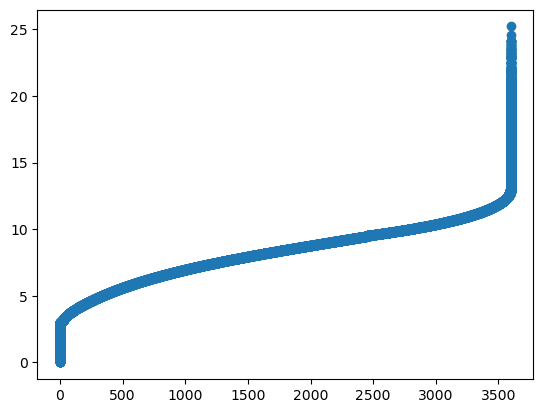

In [9]:
#scatterplot
plt.scatter(data['Theoretical_Power'],data['Wind_Speed'])

In [10]:
#split the data

x=x = data[["Theoretical_Power", "Wind_Speed"]]
y=data["Active_Power"]

In [11]:
x=x = data[["Theoretical_Power", "Wind_Speed"]].values
y=data["Active_Power"].values

In [12]:
x

array([[ 416.32890782,    5.31133604],
       [ 519.91751106,    5.67216682],
       [ 390.90001581,    5.2160368 ],
       ...,
       [1788.28475526,    8.43535805],
       [2418.38250336,    9.42136574],
       [2779.18409628,    9.97933197]])

In [13]:
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestRegressor

RFR= RandomForestRegressor(n_estimators = 750, max_depth = 4, max_leaf_nodes = 500, random_state = 1)

RFR.fit(x_train,y_train) 

RandomForestRegressor(max_depth=4, max_leaf_nodes=500, n_estimators=750,
                      random_state=1)

In [16]:
x_test

array([[7.16452560e+02, 6.26323986e+00],
       [1.66507070e+02, 4.22783899e+00],
       [9.64137061e+02, 6.88290691e+00],
       ...,
       [3.15609958e+03, 1.07004499e+01],
       [0.00000000e+00, 2.68328810e+00],
       [1.00601774e+02, 3.84762692e+00]])

In [17]:
#predcition on the test data
y_pred=RFR.predict(x_test)
y_pred

array([ 546.66390077,  153.93564142,  767.7112221 , ..., 2592.02145298,
         10.19952956,   26.09517064])

In [18]:
#predccition in the train data 
pred=RFR.predict(x_train)
pred

array([1755.21422586, 1415.80367242,  486.00579377, ...,   10.19952956,
       1619.69721272, 2897.79356349])

In [19]:
#FInding accuracy

from sklearn.metrics import r2_score

acc=r2_score(y_test,y_pred)

acc

0.9098600729923303

In [20]:
import joblib
joblib.dump(RFR, "Power_Prediction.sav")

['Power_Prediction.sav']

In [21]:
joblib.dump(RFR, open(r'C:\Users\balas\Desktop\IBM BALA PROJECT\Project Development Phase\App Build Flask\Power_Prediction.sav', 'wb'))